In [8]:
import random as rnd
import time
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Niestety standardowa implementacja QuickSort potrafi przekroczyć limit wywołań rekurencjnych już dla tablicy o rozmiarze 10_000
import sys
print(sys.getrecursionlimit())
sys.setrecursionlimit(100_000)
print(sys.getrecursionlimit())

1000
100000


# QuickSort "standardowy"

In [6]:
def partition_standardowy(tab, start, stop):
  pivot = tab[stop]
  j = start
  for i in range(start, stop):
    if tab[i]<=pivot:
      tab[i],tab[j] = tab[j],tab[i]
      j+=1
  tab[stop], tab[j] = tab[j], tab[stop]
  return j

def QuickSort_standardowy(tab, start, stop):
  if stop<=start:
    return
  pivot = partition_standardowy(tab, start, stop)
  #print(f'{start}, {pivot}, {stop}')
  QuickSort_standardowy(tab, start, pivot-1)
  QuickSort_standardowy(tab, pivot+1, stop)

# QuickSort "z losowaniem"

In [5]:
def partition_losowanie(tab, start, stop):
  # Losowanie indeksu liczby, która stanie się pivotem
  index = rnd.randint(start,stop)
  tab[stop], tab[index] = tab[index], tab[stop]
  pivot = tab[stop]

  j = start
  for i in range(start, stop):
    # Jeżeli porównywana jest równa pivotowi to w wyniku losowania
    #  l. całkowitej z zakresu od [0,1], z pr. 50% zamiana miejscami wystąpi 
    if tab[i]<pivot or tab[i]==pivot and rnd.randint(0,1):
      tab[i],tab[j] = tab[j],tab[i]
      j+=1
  tab[stop], tab[j] = tab[j], tab[stop]
  return j

def QuickSort_losowanie(tab, start, stop):
  if stop<=start:
    return
  pivot = partition_losowanie(tab, start, stop)
  QuickSort_losowanie(tab, start, pivot-1)
  QuickSort_losowanie(tab, pivot+1, stop)

# QuickSort Dutch Flag

In [4]:
def partition_dutch(tab, start, stop):
  index = rnd.randint(start, stop)
  tab[stop], tab[index] = tab[index], tab[stop]
  pivot = tab[stop]
  # Ta implementacja używa trzech wskaźników: 
  #  i do przeglądania tablicy od lewej do prawej, 
  #  j do oznaczania końca podtablicy z elementami mniejszymi od pivota 
  #  k do oznaczania początku podtablicy z elementami większymi od pivota.
  i = j = start
  k = stop - 1
  while i <= k:
    # standardowa zamiana, elemnet mniejszy od pivota przesuwa się w lewo
    if tab[i] < pivot:
      tab[i], tab[j] = tab[j], tab[i]
      i += 1
      j += 1
    # inkrementujemy tylko wskaźnik i 
    elif tab[i] == pivot:
      i += 1
    # inaczej: tab[i]>pivot, dekrementujemy wskaźnik k, 
    else:
      tab[i], tab[k] = tab[k], tab[i]
      k -= 1
  #print(f'{tab[stop]}, {tab[k+1]} = {tab[k+1]}, {tab[stop]}')
  tab[stop], tab[k+1] = tab[k+1], tab[stop]
  # W tym momencie podtablica z mniejszymi elementami znajduje się od start do j-1,
  #  podtablica z większymi elementami znajduje się od k+1 do stop-1, 
  #  a podtablica z równymi elementami znajduje się od j do k.
  #print(f'pivot:{pivot} i:{i} j:{j} k:{k} tab {tab}')
  
  # W tym rozwiązaniu zwracamy krotkę z 2-ma indeksami:
  #  j - indeks końca tablicy z elementami mniejszymi od pivota
  #  k+1 - indeks początku tablicy z elementami większymi od pivota
  return j, k+1

def QuickSort_dutch(tab, start, stop):
  if stop <= start:
    return
  pivot = partition_dutch(tab, start, stop)
  # Rekurencyjne wywołania pomijają elementy tablicy równe pivotowi
  QuickSort_dutch(tab, start, pivot[0]-1)
  QuickSort_dutch(tab, pivot[1]+1, stop)

# Testy

In [10]:
def testowanie(algorytm_sortowania, zakres_losowanych, rozmiar_tab, ile_testow):
  # stworzyłem funkcję tak by można było liczyć średni wynik z kliku testow
  czasy = []
  for _ in range(ile_testow):
    start_t = time.time()
    tablica = [rnd.randint(zakres_losowanych[0], zakres_losowanych[1]) for _ in range(rozmiar_tab)]
    #print(f'przed {tablica}')
    algorytm_sortowania(tablica, 0, len(tablica)-1)
    #print(f'po {tablica}')
    czasy.append(time.time()-start_t)
  return mean(czasy)

In [33]:
def rysuj_wykres(rozmiar_tablicy, ile_testow):
  barWidth = 0.25

  zakresy = [[1,10], [1,100], [1,1000], [1,10_000], [1,100_000]]
  standardowy = [testowanie(QuickSort_standardowy, [z[0], z[1]], rozmiar_tablicy, ile_testow) for z in zakresy]
  losowy = [testowanie(QuickSort_losowanie, [z[0], z[1]], rozmiar_tablicy, ile_testow) for z in zakresy]
  dutch = [testowanie(QuickSort_dutch, [z[0], z[1]], rozmiar_tablicy, ile_testow) for z in zakresy]

  r1 = np.arange(len(standardowy))
  r2 = [x + barWidth for x in r1]
  r3 = [x + barWidth for x in r2]

  plt.bar(r1, standardowy, color='#af1523', width=barWidth, edgecolor='black', label='Standardowy')
  plt.bar(r2, losowy, color='#ffffff', width=barWidth, edgecolor='black', label='Z losowością')
  plt.bar(r3, dutch, color='#21468b', width=barWidth, edgecolor='black', label='Dutch Flag')

  plt.xlabel('Zakresy losowanych liczb', fontweight='bold')
  plt.ylabel('Czas sortowania [s]', fontweight='bold')
  plt.xticks([r + barWidth for r in range(len(standardowy))], ['[1,10]', '[1,100]', '[1,1000]', '[1,10_000]', '[1,100_000]'])
  plt.legend()
  plt.title("Szybkość QuickSort'a dla tablicy rozmiaru "+str(rozmiar_tablicy))
  plt.show()

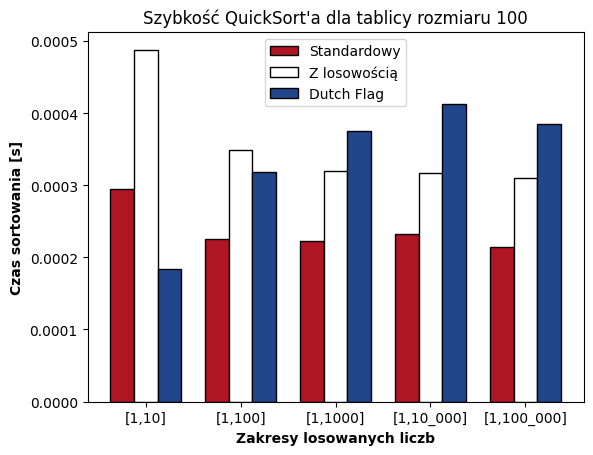

In [34]:
rysuj_wykres(100, 1000)

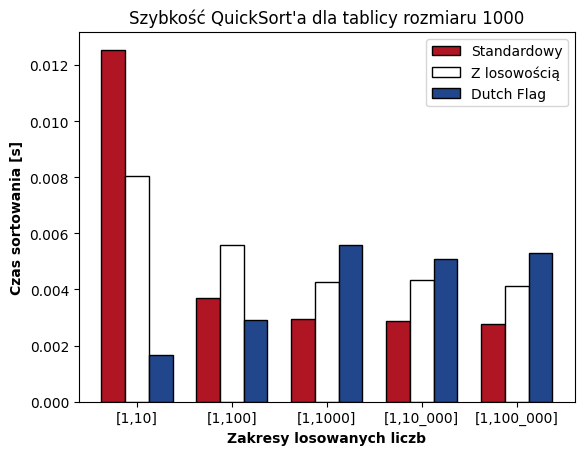

In [36]:
rysuj_wykres(1_000, 20)

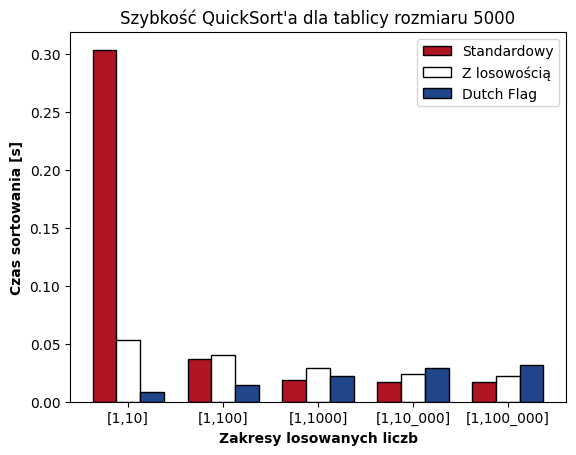

In [38]:
rysuj_wykres(5_000, 20)

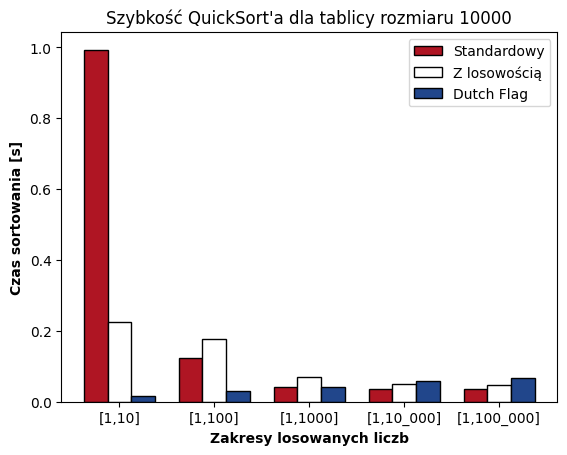

In [16]:
rysuj_wykres(10_000, 5)

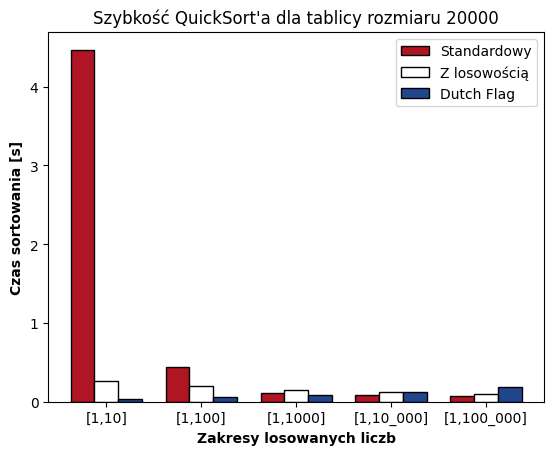

In [17]:
rysuj_wykres(20_000, 5)

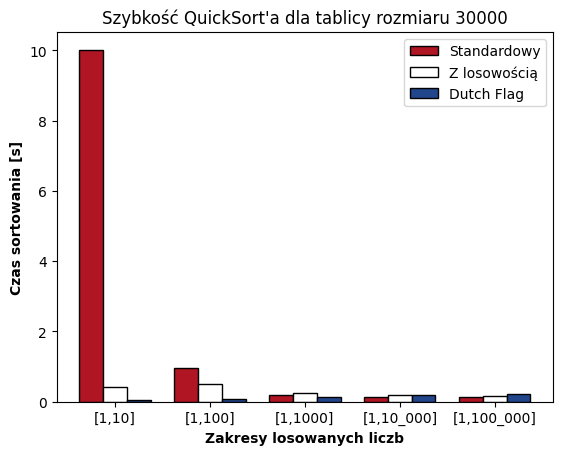

In [18]:
rysuj_wykres(30_000, 5)

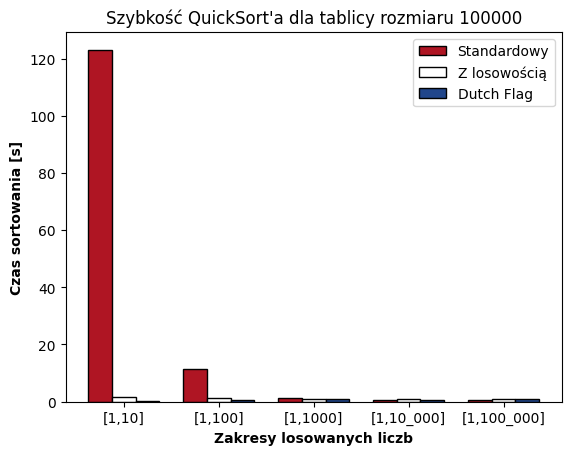

In [13]:
rysuj_wykres(100_000, 5)

# Podsumowanie
Standardowa implementacja radzi sobie tragicznie w sytuacjach, w których w tablicy znajduje się wiele identycznych elementów. Za to taki przypadek jest idealny dla usprawnienia Dutch Flag, które w sytuacji elementów równych pivotowi inkrementuje jedynie wskaźnik niedokonując operacji zamiany wartości.

Przewaga Dutch Flag spada wraz ze wzrostem zakresu losowanych liczb (a co za tym idzie spadkiem prawdopodobieństwa znajdowania się w tablicy identycznych elementów) wynika to z konieczności używania dodatkowego wskaźnika i większej ilości dokonywanych porównań w funkcji partition. W takiej sytuacji najlepiej radzi sobie standardowa implementacja, gdzie znajduje się tylko jedno porównanie <=pivot

Ironicznie, najbardziej przewidywalnie w zależności od wielkości tablicy i zakresów sortuje QuickSort z losowym pivotem i o losowym zachowaniu przy napotkaniu elementu równego pivotowi. W przypadkach najgorszych radzi sobie lepiej od standardowej implementacji a pozostałych znajduje się gdzieś w środku zestawienia.